# Analysis

### Imports

In [1]:
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

DATA_PATH = "../../data/home_default/"

### Styling helpers

In [2]:
# A short hand way to plot most bar graphs
def pretty_bar(data, ax, xlabel=None, ylabel=None, title=None, int_text=False):
    
    # Plots the data
    fig = sns.barplot(data.values, data.index, ax=ax)
    
    # Places text for each value in data
    for i, v in enumerate(data.values):
        
        # Decides whether the text should be rounded or left as floats
        if int_text:
            ax.text(0, i, int(v), color='k', fontsize=14)
        else:
            ax.text(0, i, round(v, 3), color='k', fontsize=14)
     
    ### Labels plot
    ylabel != None and fig.set(ylabel=ylabel)
    xlabel != None and fig.set(xlabel=xlabel)
    title != None and fig.set(title=title)

    
### Used to style Python print statements
class color:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

# Table of Contents

1.) [Train and Test](#train_test)

2.) [Bureau](#bureau)

3.) [Bureau Balance](#bureau_balance)

4.) [POS CASH](#pos_cash)

5.) [Credit Card Balance](#credit_card)

6.) [Previous Application](#prev_app)

7.) [Installments Payments](#install_payments)

<a name="train_test"></a>

### {train|test}.csv

(Open to see description of columns)

<div hidden>

,Row,Description,Special

1,SK_ID_CURR,ID of loan in our sample,
2,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",
5,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,
6,CODE_GENDER,Gender of the client,
7,FLAG_OWN_CAR,Flag if the client owns a car,
8,FLAG_OWN_REALTY,Flag if client owns a house or flat,
9,CNT_CHILDREN,Number of children the client has,
10,AMT_INCOME_TOTAL,Income of the client,
11,AMT_CREDIT,Credit amount of the loan,
12,AMT_ANNUITY,Loan annuity,
13,AMT_GOODS_PRICE,For consumer loans it is the price of the goods for which the loan is given,
14,NAME_TYPE_SUITE,Who was accompanying client when he was applying for the loan,
15,NAME_INCOME_TYPE,"Clients income type (businessman, working, maternity leave,Ö)",
16,NAME_EDUCATION_TYPE,Level of highest education the client achieved,
17,NAME_FAMILY_STATUS,Family status of the client,
18,NAME_HOUSING_TYPE,"What is the housing situation of the client (renting, living with parents, ...)",
19,REGION_POPULATION_RELATIVE,Normalized population of region where client lives (higher number means the client lives in more populated region),normalized 
20,DAYS_BIRTH,Client's age in days at the time of application,time only relative to the application
21,DAYS_EMPLOYED,How many days before the application the person started current employment,time only relative to the application
22,DAYS_REGISTRATION,How many days before the application did client change his registration,time only relative to the application
23,DAYS_ID_PUBLISH,How many days before the application did client change the identity document with which he applied for the loan,time only relative to the application
24,OWN_CAR_AGE,Age of client's car,
25,FLAG_MOBIL,"Did client provide mobile phone (1=YES, 0=NO)",
26,FLAG_EMP_PHONE,"Did client provide work phone (1=YES, 0=NO)",
27,FLAG_WORK_PHONE,"Did client provide home phone (1=YES, 0=NO)",
28,FLAG_CONT_MOBILE,"Was mobile phone reachable (1=YES, 0=NO)",
29,FLAG_PHONE,"Did client provide home phone (1=YES, 0=NO)",
30,FLAG_EMAIL,"Did client provide email (1=YES, 0=NO)",
31,OCCUPATION_TYPE,What kind of occupation does the client have,
32,CNT_FAM_MEMBERS,How many family members does client have,
33,REGION_RATING_CLIENT,"Our rating of the region where client lives (1,2,3)",
34,REGION_RATING_CLIENT_W_CITY,"Our rating of the region where client lives with taking city into account (1,2,3)",
35,WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply for the loan,
36,HOUR_APPR_PROCESS_START,Approximately at what hour did the client apply for the loan,rounded
37,REG_REGION_NOT_LIVE_REGION,"Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)",
38,REG_REGION_NOT_WORK_REGION,"Flag if client's permanent address does not match work address (1=different, 0=same, at region level)",
39,LIVE_REGION_NOT_WORK_REGION,"Flag if client's contact address does not match work address (1=different, 0=same, at region level)",
40,REG_CITY_NOT_LIVE_CITY,"Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)",
41,REG_CITY_NOT_WORK_CITY,"Flag if client's permanent address does not match work address (1=different, 0=same, at city level)",
42,LIVE_CITY_NOT_WORK_CITY,"Flag if client's contact address does not match work address (1=different, 0=same, at city level)",
43,ORGANIZATION_TYPE,Type of organization where client works,

{44-46},EXT_SOURCE_{1-3},Normalized score from external data source,normalized

47,APARTMENTS_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
48,BASEMENTAREA_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
49,YEARS_BEGINEXPLUATATION_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
50,YEARS_BUILD_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
51,COMMONAREA_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized

52,ELEVATORS_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of 
building, number of elevators, number of entrances, state of the building, number of floor",normalized

53,ENTRANCES_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
54,FLOORSMAX_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
55,FLOORSMIN_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
56,LANDAREA_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
57,LIVINGAPARTMENTS_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
58,LIVINGAREA_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
59,NONLIVINGAPARTMENTS_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
60,NONLIVINGAREA_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
61,APARTMENTS_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
62,BASEMENTAREA_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
63,YEARS_BEGINEXPLUATATION_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
64,YEARS_BUILD_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
65,COMMONAREA_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
66,ELEVATORS_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
67,ENTRANCES_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
68,FLOORSMAX_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
69,FLOORSMIN_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
70,LANDAREA_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
71,LIVINGAPARTMENTS_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
72,LIVINGAREA_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
73,NONLIVINGAPARTMENTS_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
74,NONLIVINGAREA_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
75,APARTMENTS_MEDI,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
76,BASEMENTAREA_MEDI,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
77,YEARS_BEGINEXPLUATATION_MEDI,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
78,YEARS_BUILD_MEDI,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
79,COMMONAREA_MEDI,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
80,ELEVATORS_MEDI,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
81,ENTRANCES_MEDI,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
82,FLOORSMAX_MEDI,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
83,FLOORSMIN_MEDI,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
84,LANDAREA_MEDI,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
85,LIVINGAPARTMENTS_MEDI,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
86,LIVINGAREA_MEDI,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
87,NONLIVINGAPARTMENTS_MEDI,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
88,NONLIVINGAREA_MEDI,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
89,FONDKAPREMONT_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
90,HOUSETYPE_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
91,TOTALAREA_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
92,WALLSMATERIAL_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
93,EMERGENCYSTATE_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
94,OBS_30_CNT_SOCIAL_CIRCLE,How many observation of client's social surroundings with observable 30 DPD (days past due) default,
95,DEF_30_CNT_SOCIAL_CIRCLE,How many observation of client's social surroundings defaulted on 30 DPD (days past due) ,
96,OBS_60_CNT_SOCIAL_CIRCLE,How many observation of client's social surroundings with observable 60 DPD (days past due) default,
97,DEF_60_CNT_SOCIAL_CIRCLE,How many observation of client's social surroundings defaulted on 60 (days past due) DPD,
98,DAYS_LAST_PHONE_CHANGE,How many days before application did client change phone,

{99-118},FLAG_DOCUMENT_{2-21},Did client provide document {2-21},

119,AMT_REQ_CREDIT_BUREAU_HOUR,Number of enquiries to Credit Bureau about the client one hour before application,
120,AMT_REQ_CREDIT_BUREAU_DAY,Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application),
121,AMT_REQ_CREDIT_BUREAU_WEEK,Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application),
122,AMT_REQ_CREDIT_BUREAU_MON,Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application),
123,AMT_REQ_CREDIT_BUREAU_QRT,Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application),
124,AMT_REQ_CREDIT_BUREAU_YEAR,Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application),

</div>

In [3]:
train = pd.read_csv(DATA_PATH + "train.csv")
test  = pd.read_csv(DATA_PATH + "test.csv")

In [4]:
print("Shape of train:", train.shape)
print("Shape of test:",  test.shape)

print("\n{}Columns of train:{}".format(color.UNDERLINE, color.END))
train.columns.values

Shape of train: (307511, 122)
Shape of test: (48744, 121)

Columns of train:


array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
      

<a name="bureau"></a>

### bureau.csv

(Open to see description of columns)

<div hidden>

,Row,Description,Special

125,SK_ID_CURR,"ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau ",hashed
126,SK_BUREAU_ID,Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application),hashed
127,CREDIT_ACTIVE,Status of the Credit Bureau (CB) reported credits,
128,CREDIT_CURRENCY,Recoded currency of the Credit Bureau credit,recoded
129,DAYS_CREDIT,How many days before current application did client apply for Credit Bureau credit,time only relative to the application
130,CREDIT_DAY_OVERDUE,Number of days past due on CB credit at the time of application for related loan in our sample,
131,DAYS_CREDIT_ENDDATE,Remaining duration of CB credit (in days) at the time of application in Home Credit,time only relative to the application
132,DAYS_ENDDATE_FACT,Days since CB credit ended at the time of application in Home Credit (only for closed credit),time only relative to the application
133,AMT_CREDIT_MAX_OVERDUE,Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample),
134,CNT_CREDIT_PROLONG,How many times was the Credit Bureau credit prolonged,
135,AMT_CREDIT_SUM,Current credit amount for the Credit Bureau credit,
136,AMT_CREDIT_SUM_DEBT,Current debt on Credit Bureau credit,
137,AMT_CREDIT_SUM_LIMIT,Current credit limit of credit card reported in Credit Bureau,
138,AMT_CREDIT_SUM_OVERDUE,Current amount overdue on Credit Bureau credit,
139,CREDIT_TYPE,"Type of Credit Bureau credit (Car, cash,...)",
140,DAYS_CREDIT_UPDATE,How many days before loan application did last information about the Credit Bureau credit come,time only relative to the application
141,AMT_ANNUITY,Annuity of the Credit Bureau credit,

</div>

In [18]:
bureau = pd.read_csv(DATA_PATH + "bureau.csv")
print("Shape of bureau:",  bureau.shape)

print("\n{}Columns of bureau:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(bureau.columns.values))

Shape of bureau: (1716428, 17)

Columns of bureau:
SK_ID_CURR --- SK_ID_BUREAU --- CREDIT_ACTIVE --- CREDIT_CURRENCY --- DAYS_CREDIT --- CREDIT_DAY_OVERDUE --- DAYS_CREDIT_ENDDATE --- DAYS_ENDDATE_FACT --- AMT_CREDIT_MAX_OVERDUE --- CNT_CREDIT_PROLONG --- AMT_CREDIT_SUM --- AMT_CREDIT_SUM_DEBT --- AMT_CREDIT_SUM_LIMIT --- AMT_CREDIT_SUM_OVERDUE --- CREDIT_TYPE --- DAYS_CREDIT_UPDATE --- AMT_ANNUITY


<a name="bureau_balance"></a>

### bureau_balance.csv

(Open to see description of columns)

<div hidden>

,Row,Description,Special

142,SK_BUREAU_ID,Recoded ID of Credit Bureau credit (unique coding for each application) - use this to join to CREDIT_BUREAU table ,hashed
143,MONTHS_BALANCE,Month of balance relative to application date (-1 means the freshest balance date),time only relative to the application
144,STATUS,"Status of Credit Bureau loan during the month (active, closed, DPD0-30,Ö [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,Ö 5 means DPD 120+ or sold or written off ] )",

</div>

In [19]:
bureau_balance = pd.read_csv(DATA_PATH + "bureau_balance.csv")
print("Shape of bureau_balance:",  bureau_balance.shape)

print("\n{}Columns of bureau_balance:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(bureau_balance.columns.values))

Shape of bureau_balance: (27299925, 3)

Columns of bureau_balance:
SK_ID_BUREAU --- MONTHS_BALANCE --- STATUS


### Let's look at Status, maybe there's a bad status

In [28]:
bureau_balance.groupby("")["STATUS"].head()

C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64

### Notes:

Okay so we see that the variable SK_ID_BUREAU should be connected to the bureau.csv table

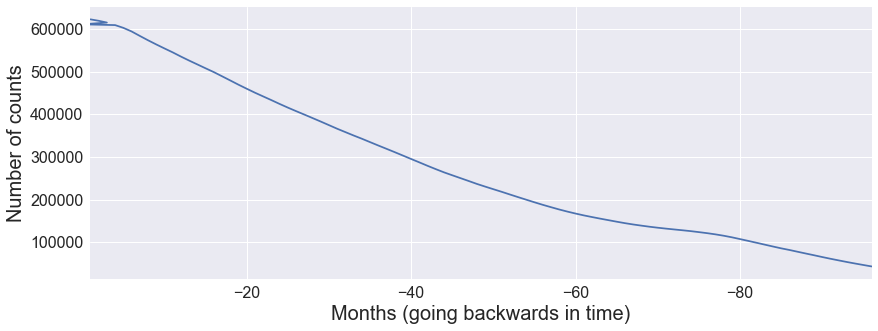

In [41]:
plt.figure(figsize=(14, 5))

temp = bureau_balance.MONTHS_BALANCE.value_counts()
temp.plot(kind="line", fontsize=16)

plt.ylabel("Number of counts", fontsize=20)
_ = plt.xlabel("Months (going backwards in time)", fontsize=20)

<a name="pos_cash"></a>

### POS_CASH_balance.csv

(Open to see description of columns)

<div hidden>

,Row,Description,Special

145,SK_ID_PREV ,"ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)",
146,SK_ID_CURR,ID of loan in our sample,
147,MONTHS_BALANCE,"Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )",time only relative to the application
148,CNT_INSTALMENT,Term of previous credit (can change over time),
149,CNT_INSTALMENT_FUTURE,Installments left to pay on the previous credit,
150,NAME_CONTRACT_STATUS,Contract status during the month,
151,SK_DPD,DPD (days past due) during the month of previous credit,
152,SK_DPD_DEF,DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit,


</div>

In [20]:
pcb = pd.read_csv(DATA_PATH + "POS_CASH_balance.csv")
print("Shape of pcb:",  pcb.shape)

print("\n{}Columns of pcb:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(pcb.columns.values))

Shape of pcb: (10001358, 8)

Columns of pcb:
SK_ID_PREV --- SK_ID_CURR --- MONTHS_BALANCE --- CNT_INSTALMENT --- CNT_INSTALMENT_FUTURE --- NAME_CONTRACT_STATUS --- SK_DPD --- SK_DPD_DEF


<a name="credit_card"></a>

### credit_card_balance.csv

(Open to see description of columns)


<div hidden>

,Row,Description,Special

153,SK_ID_PREV ,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)",hashed
154,SK_ID_CURR,ID of loan in our sample,hashed
155,MONTHS_BALANCE,Month of balance relative to application date (-1 means the freshest balance date),time only relative to the application
156,AMT_BALANCE,Balance during the month of previous credit,
157,AMT_CREDIT_LIMIT_ACTUAL,Credit card limit during the month of the previous credit,
158,AMT_DRAWINGS_ATM_CURRENT,Amount drawing at ATM during the month of the previous credit,
159,AMT_DRAWINGS_CURRENT,Amount drawing during the month of the previous credit,
160,AMT_DRAWINGS_OTHER_CURRENT,Amount of other drawings during the month of the previous credit,
161,AMT_DRAWINGS_POS_CURRENT,Amount drawing or buying goods during the month of the previous credit,
162,AMT_INST_MIN_REGULARITY,Minimal installment for this month of the previous credit,
163,AMT_PAYMENT_CURRENT,How much did the client pay during the month on the previous credit,
164,AMT_PAYMENT_TOTAL_CURRENT,How much did the client pay during the month in total on the previous credit,
165,AMT_RECEIVABLE_PRINCIPAL,Amount receivable for principal on the previous credit,
166,AMT_RECIVABLE,Amount receivable on the previous credit,
167,AMT_TOTAL_RECEIVABLE,Total amount receivable on the previous credit,
168,CNT_DRAWINGS_ATM_CURRENT,Number of drawings at ATM during this month on the previous credit,
169,CNT_DRAWINGS_CURRENT,Number of drawings during this month on the previous credit,
170,CNT_DRAWINGS_OTHER_CURRENT,Number of other drawings during this month on the previous credit,
171,CNT_DRAWINGS_POS_CURRENT,Number of drawings for goods during this month on the previous credit,
172,CNT_INSTALMENT_MATURE_CUM,Number of paid installments on the previous credit,
173,NAME_CONTRACT_STATUS,"Contract status (active signed,...) on the previous credit",
174,SK_DPD,DPD (Days past due) during the month on the previous credit,
175,SK_DPD_DEF,DPD (Days past due) during the month with tolerance (debts with low loan amounts are ignored) of the previous credit,

</div>

In [21]:
credit_card = pd.read_csv(DATA_PATH + "credit_card_balance.csv")
print("Shape of credit_card:",  credit_card.shape)

print("\n{}Columns of credit_card:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(credit_card.columns.values))

Shape of credit_card: (3840312, 23)

Columns of credit_card:
SK_ID_PREV --- SK_ID_CURR --- MONTHS_BALANCE --- AMT_BALANCE --- AMT_CREDIT_LIMIT_ACTUAL --- AMT_DRAWINGS_ATM_CURRENT --- AMT_DRAWINGS_CURRENT --- AMT_DRAWINGS_OTHER_CURRENT --- AMT_DRAWINGS_POS_CURRENT --- AMT_INST_MIN_REGULARITY --- AMT_PAYMENT_CURRENT --- AMT_PAYMENT_TOTAL_CURRENT --- AMT_RECEIVABLE_PRINCIPAL --- AMT_RECIVABLE --- AMT_TOTAL_RECEIVABLE --- CNT_DRAWINGS_ATM_CURRENT --- CNT_DRAWINGS_CURRENT --- CNT_DRAWINGS_OTHER_CURRENT --- CNT_DRAWINGS_POS_CURRENT --- CNT_INSTALMENT_MATURE_CUM --- NAME_CONTRACT_STATUS --- SK_DPD --- SK_DPD_DEF


<a name="prev_app"></a>

### previous_application.csv

(Open to see description of columns)

<div hidden>

,Row,Description,Special

176,SK_ID_PREV ,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit) ",hashed
177,SK_ID_CURR,ID of loan in our sample,hashed
178,NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application",
179,AMT_ANNUITY,Annuity of previous application,
180,AMT_APPLICATION,For how much credit did client ask on the previous application,
181,AMT_CREDIT,"Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT",
182,AMT_DOWN_PAYMENT,Down payment on the previous application,
183,AMT_GOODS_PRICE,Goods price of good that client asked for (if applicable) on the previous application,
184,WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply for previous application,
185,HOUR_APPR_PROCESS_START,Approximately at what day hour did the client apply for the previous application,rounded
186,FLAG_LAST_APPL_PER_CONTRACT,Flag if it was last application for the previous contract. Sometimes by mistake of client or our clerk there could be more applications for one single contract,
187,NFLAG_LAST_APPL_IN_DAY,Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a day. Rarely it could also be error in our system that one application is in the database twice,
188,NFLAG_MICRO_CASH,Flag Micro finance loan,
189,RATE_DOWN_PAYMENT,Down payment rate normalized on previous credit,normalized
190,RATE_INTEREST_PRIMARY,Interest rate normalized on previous credit,normalized
191,RATE_INTEREST_PRIVILEGED,Interest rate normalized on previous credit,normalized
192,NAME_CASH_LOAN_PURPOSE,Purpose of the cash loan,
193,NAME_CONTRACT_STATUS,"Contract status (approved, cancelled, ...) of previous application",
194,DAYS_DECISION,Relative to current application when was the decision about previous application made,time only relative to the application
195,NAME_PAYMENT_TYPE,Payment method that client chose to pay for the previous application,
196,CODE_REJECT_REASON,Why was the previous application rejected,
197,NAME_TYPE_SUITE,Who accompanied client when applying for the previous application,
198,NAME_CLIENT_TYPE,Was the client old or new client when applying for the previous application,
199,NAME_GOODS_CATEGORY,What kind of goods did the client apply for in the previous application,
200,NAME_PORTFOLIO,"Was the previous application for CASH, POS, CAR, Ö",
201,NAME_PRODUCT_TYPE,Was the previous application x-sell o walk-in,
202,CHANNEL_TYPE,Through which channel we acquired the client on the previous application,
203,SELLERPLACE_AREA,Selling area of seller place of the previous application,
204,NAME_SELLER_INDUSTRY,The industry of the seller,
205,CNT_PAYMENT,Term of previous credit at application of the previous application,
206,NAME_YIELD_GROUP,Grouped interest rate into small medium and high of the previous application,grouped
207,PRODUCT_COMBINATION,Detailed product combination of the previous application,
208,DAYS_FIRST_DRAWING,Relative to application date of current application when was the first disbursement of the previous application,time only relative to the application
209,DAYS_FIRST_DUE,Relative to application date of current application when was the first due supposed to be of the previous application,time only relative to the application
210,DAYS_LAST_DUE_1ST_VERSION,Relative to application date of current application when was the first due of the previous application,time only relative to the application
211,DAYS_LAST_DUE,Relative to application date of current application when was the last due date of the previous application,time only relative to the application
212,DAYS_TERMINATION,Relative to application date of current application when was the expected termination of the previous application,time only relative to the application
213,NFLAG_INSURED_ON_APPROVAL,Did the client requested insurance during the previous application,

</div>

In [22]:
prev_app = pd.read_csv(DATA_PATH + "previous_application.csv")
print("Shape of prev_app:",  prev_app.shape)

print("\n{}Columns of prev_app:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(prev_app.columns.values))

Shape of prev_app: (1670214, 37)

Columns of prev_app:
SK_ID_PREV --- SK_ID_CURR --- NAME_CONTRACT_TYPE --- AMT_ANNUITY --- AMT_APPLICATION --- AMT_CREDIT --- AMT_DOWN_PAYMENT --- AMT_GOODS_PRICE --- WEEKDAY_APPR_PROCESS_START --- HOUR_APPR_PROCESS_START --- FLAG_LAST_APPL_PER_CONTRACT --- NFLAG_LAST_APPL_IN_DAY --- RATE_DOWN_PAYMENT --- RATE_INTEREST_PRIMARY --- RATE_INTEREST_PRIVILEGED --- NAME_CASH_LOAN_PURPOSE --- NAME_CONTRACT_STATUS --- DAYS_DECISION --- NAME_PAYMENT_TYPE --- CODE_REJECT_REASON --- NAME_TYPE_SUITE --- NAME_CLIENT_TYPE --- NAME_GOODS_CATEGORY --- NAME_PORTFOLIO --- NAME_PRODUCT_TYPE --- CHANNEL_TYPE --- SELLERPLACE_AREA --- NAME_SELLER_INDUSTRY --- CNT_PAYMENT --- NAME_YIELD_GROUP --- PRODUCT_COMBINATION --- DAYS_FIRST_DRAWING --- DAYS_FIRST_DUE --- DAYS_LAST_DUE_1ST_VERSION --- DAYS_LAST_DUE --- DAYS_TERMINATION --- NFLAG_INSURED_ON_APPROVAL


<a name="install_payments"></a>

### installments_payments.csv

(Open to see description of columns)

<div hidden>

,Table,Row,Description,Special

214,SK_ID_PREV ,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)",hashed
215,SK_ID_CURR,ID of loan in our sample,hashed
216,NUM_INSTALMENT_VERSION,Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed,
217,NUM_INSTALMENT_NUMBER,On which installment we observe payment,
218,DAYS_INSTALMENT,When the installment of previous credit was supposed to be paid (relative to application date of current loan),time only relative to the application
219,DAYS_ENTRY_PAYMENT,When was the installments of previous credit paid actually (relative to application date of current loan),time only relative to the application
220,AMT_INSTALMENT,What was the prescribed installment amount of previous credit on this installment,
221,AMT_PAYMENT,What the client actually paid on previous credit on this installment,


</div>

In [23]:
install_pay = pd.read_csv(DATA_PATH + "installments_payments.csv")
print("Shape of install_pay:",  install_pay.shape)

print("\n{}Columns of install_pay:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(install_pay.columns.values))

Shape of install_pay: (13605401, 8)

Columns of install_pay:
SK_ID_PREV --- SK_ID_CURR --- NUM_INSTALMENT_VERSION --- NUM_INSTALMENT_NUMBER --- DAYS_INSTALMENT --- DAYS_ENTRY_PAYMENT --- AMT_INSTALMENT --- AMT_PAYMENT
